In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

/home/stef/miniconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


rdkit.Chem.rdchem.Mol

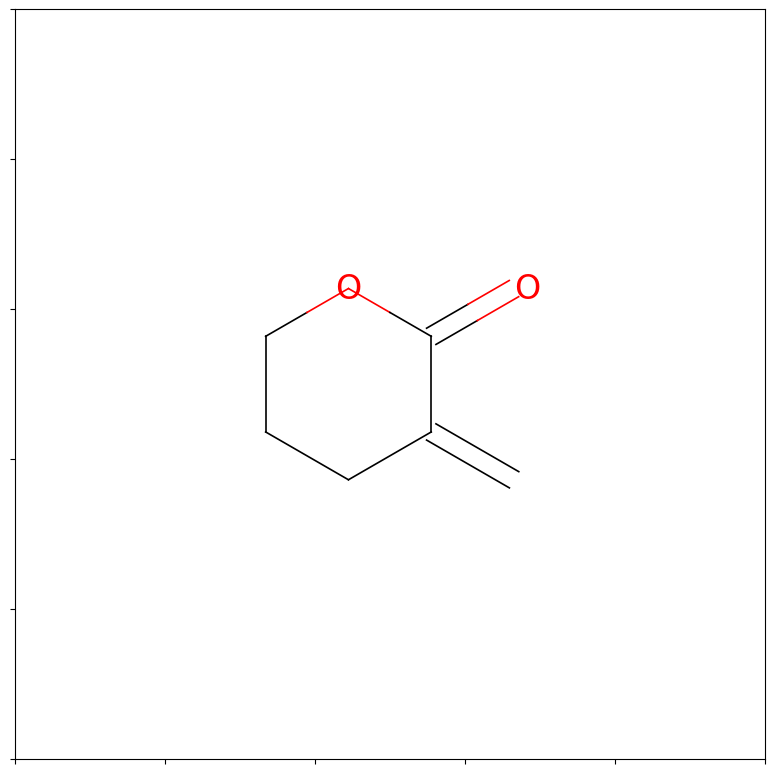

In [4]:
mol = Chem.MolFromSmiles('C=C1CCCOC1=O')
img = Draw.MolToMPL(mol)
img.show()
type(mol)


In [3]:
rxn_str = 'C=C1CCCOC1=O' + '>>' + 'O'
rxn = AllChem.ReactionFromSmarts(rxn_str, useSmiles=True)
img = Draw.ReactionToImage(rxn)
img.show()

Gtk-Message: 16:21:41.796: Failed to load module "xapp-gtk3-module"


In [62]:
# Draw reaction to file
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn1)
png = d2d.GetDrawingText()
open('./test_rxn.png','wb+').write(png)

# Get SMARTS string of reaction
AllChem.ReactionToSmarts(rxn1)

'[#6:1]-[#8:2]-[#6:3](=[#8:4])-[#6:5]/[#7:6]=[#6:7]/[#6:8]1-[#6:9]=[#6:10]-[#6:11]=[#6:12]-[#6:13]=1.[#6:14](=[#6:15]\\[#6:16](=[#8:20])-[#8:21]-[#6:23]-[#6:25])\\[#6:17](=[#8:18])-[#8:19]-[#6:22]-[#6:24]>>[#6:5]1(-[#7:6]-[#6:7](-[#6:14](-[#6:15]-1-[#6:16](=[#8:20])-[#8:21]-[#6:23]-[#6:25])-[#6:17](=[#8:18])-[#8:19]-[#6:22]-[#6:24])-[#6:8]1-[#6:9]=[#6:10]-[#6:11]=[#6:12]-[#6:13]=1)-[#6:3](=[#8:4])-[#8:2]-[#6:1]'

In [63]:
# Get reaction center
rxn1.Initialize()
rxn1.GetReactingAtoms()

((4, 5, 6), (0, 1))

In [60]:
sma='[Cl:1][CH2:2][CH2:3][CH2:4][C:5]([C:7]1[CH:12]=[CH:11][C:10]([CH:13]([CH3:15])[CH3:14])=[CH:9][CH:8]=1)=[O:6].[Br:16]N1C(=O)CCC1=O'\
'>C(Cl)(Cl)(Cl)Cl.CC(N=NC(C#N)(C)C)(C#N)C>'\
'[Br:16][C:13]([C:10]1=[CH:9][CH:8]=[C:7]([C:5](=[O:6])[CH2:4][CH2:3][CH2:2][Cl:1])[CH:12]=[CH:11]1)([CH3:15])[CH3:14]'
rxn = AllChem.ReactionFromSmarts(sma)
rxn.Initialize()
rats = rxn.GetReactingAtoms()
print(rats)

((9,), (0, 1, 2, 3, 4, 5, 6, 7))


In [61]:
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
open('./tricky_rxn.png','wb+').write(png)

20621

In [23]:
# Original tricky
sma="[Cl:1][CH2:2][CH2:3][CH2:4][C:5]([C:7]1[CH:12]=[CH:11][C:10]([CH:13]([CH3:15])[CH3:14])=[CH:9][CH:8]=1)=[O:6].[Br:16]N1C(=O)CCC1=O>C(Cl)(Cl)(Cl)Cl.CC(N=NC(C#N)(C)C)(C#N)C>[Br:16][C:13]([C:10]1[CH:9]=[CH:8][C:7]([C:5](=[O:6])[CH2:4][CH2:3][CH2:2][Cl:1])=[CH:12][CH:11]=1)([CH3:15])[CH3:14]"
rxn = AllChem.ReactionFromSmarts(sma)
rxn.Initialize()
rats = rxn.GetReactingAtoms()
print(rats)

((5, 6, 7, 8, 9, 12, 13), (0, 1, 2, 3, 4, 5, 6, 7))


In [24]:
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
open('./original_tricky_rxn.png','wb+').write(png)

20565

In [29]:
# Original tricky
sma="[Cl:1][CH2:2][CH2:3][CH2:4][C:5]([C:7]1[CH:12]=[CH:11][C:10]([CH:13]([CH3:15])[CH3:14])=[CH:9][CH:8]=1)=[O:6].[Br:16]N1C(=O)CCC1=O>C(Cl)(Cl)(Cl)Cl.CC(N=NC(C#N)(C)C)(C#N)C>[Br:16][C:13]([C:10]1[CH:9]=[CH:8][C:7]([C:5](=[O:6])[CH2:4][CH2:3][CH2:2][Cl:1])=[CH:12][CH:11]=1)([CH3:15])[CH3:14]"
rxn = AllChem.ReactionFromSmarts(sma)
rxn.Initialize()
rats = rxn.GetReactingAtoms()
print(rats)

((5, 6, 7, 8, 9, 12, 13), (0, 1, 2, 3, 4, 5, 6, 7))


In [64]:
# Try sanitize mols
rs, ps = [elt.split('.') for elt in sma.split('>')[::2]]
rs = [Chem.CanonSmiles(Chem.MolToSmiles(Chem.MolFromSmarts(elt))) for elt in rs]
ps = [Chem.CanonSmiles(Chem.MolToSmiles(Chem.MolFromSmarts(elt))) for elt in ps]
sma = '.'.join(rs) + '>>' + '.'.join(ps)
rxn = AllChem.ReactionFromSmarts(sma)
rxn.Initialize()
rats = rxn.GetReactingAtoms()
print(rats)

((6, 7, 8, 9, 10, 12, 13, 14), (0, 1, 2, 3, 4, 5, 6, 7))


In [66]:
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
open('./new_rxn.png','wb+').write(png)

19560

In [69]:
sma = '[cH:1]1[cH:2][c:3]([F:4])[n:5][cH:6][cH:7]1>>[cH:1]1[cH:2][c:3]([Cl:4])[n:5][cH:6][cH:7]1'
sma = '[cH:1]:1:[cH:2]:[c:3]([F:4]):[n:5]:[cH:6]:[cH:7]:1>>[cH:1]:1:[cH:2]:[c:3]([Cl:4]):[n:5]:[cH:6]:[cH:7]:1'
rxn = AllChem.ReactionFromSmarts(sma)
rxn.Initialize()
rats = rxn.GetReactingAtoms()
print(rats)
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
open('./new_new_rxn.png','wb+').write(png)

((3,),)


19567